# Simple Linear Regression 

This Notebook is part of a series of task given by <a href='https://www.thesparksfoundationsingapore.org/'>The Sparks Foundation</a> as part of GRIP Programme.

### Prediction using Supervised Learning 

###### Objective:
- To predict the percentage of a student based on the number of study hours.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Data Given

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


There are only 2 variables in the dataset

In [3]:
data.shape

(25, 2)

The dataset has only 25 records, this dataset is comparatively a small dataset.

###### Data Visualization

Before we apply any any model on some data we need to check the relationship between the data and there is no other good way to check in data than scatter plot

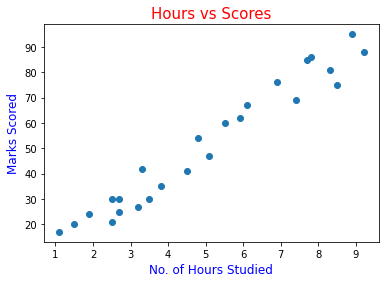

In [4]:
plt.title('Hours vs Scores', fontdict = {'Size' : 15, 'Color': 'Red'})

plt.scatter(x = 'Hours', y = 'Scores', data = data)

plt.xlabel('No. of Hours Studied', fontdict = {'Size' : 12, 'Color': 'Blue'})
plt.ylabel('Marks Scored', fontdict = {'Size' : 12, 'Color': 'Blue'})

plt.show()

###### Inference:

There is a positive linear relationship between the No. of Hours the student has studied and the marks he has scored. The figure suggests that as the no. of hours the student studies increase the marks they scored also increases.

In [5]:
#Keeping all the independent variables in X and putting the target variables in y
X = data.iloc[:, :-1]
y = data.iloc[:,1]

In [6]:
#splitting data in train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Here train_size = 0.7 & test_size = 0.3 implies that the data is to be split into a ratio of 7:3.

In [7]:
#fitting the linear model with the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

###### Fitting the trained line through the scatter plot

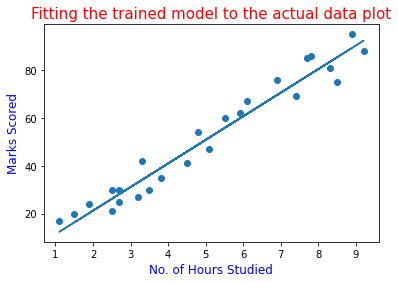

In [8]:
plt.title('Fitting the trained model to the actual data plot', fontdict = {'Size' : 15, 'Color': 'Red'})

plt.scatter(X, y)
plt.plot(X, linreg.coef_ * X + linreg.intercept_)

plt.xlabel('No. of Hours Studied', fontdict = {'Size' : 12, 'Color' : 'Blue'})
plt.ylabel('Marks Scored', fontdict = {'Size' : 12, 'Color' : 'Blue'})

plt.show()

###### Predictions

In [9]:
y_pred = linreg.predict(X_test)

In [10]:
#Comparing Actual and Predicted Scores
y_pred_final = pd.DataFrame({'Actual Scores' : y_test, 'Predicted Scores' : y_pred})
y_pred_final.head()

,Actual Scores,Predicted Scores
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714


Now that the model is ready and can predict the marks scored by the student when the no. of study hours is given, you can test it on your own data

Let's say we wanted to know the score of a student who has studied 9.25 hrs/day

In [11]:
own_data = [[9.25]]
own_data_prediction = linreg.predict(own_data)
print('The marks score by a student studying 9.2 hr/day is {0}'.format(round(own_data_prediction[0], 2)))

The marks score by a student studying 9.2 hr/day is 92.81


###### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 25.678419573283865
